
# Demonstrating  Kruskal's Minimum Spanning Tree Algorithm

### 1. [Usecases](#usecases)
### 2. [Minimum Spanning Tree](#mst)
### 3. [The Solution: Kruskal's Algorithm](#solution)
### 4. [Complexity Analysis](#analysis)
### 5. [Sources](#sources)

---

Made by Mandeep

Github: https://github.com/llGOKUll

Email: mandeepch868@gmail.com

## Usescases <a class="anchor" id="usecases"></a>

We begin with describing the situations where Kruskal's MST can be put to use.

### **Aftermath of a disaster**, leads to disconnected road networks.The *minimum number of roads* that required to built to restore travelling among all required places such as Hospitals, Post Office, etc.
<div style="margin:4rem"/>
<div style="display:flex">
<img src="http://s3.amazonaws.com/darkroom-cdn/2015/05/AP-Nepal-Earthquake-2.jpg" alt="Drawing" style="width: 500px;"/>
<img src="https://images.unsplash.com/photo-1601931163309-fe9459564c03?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80" alt="Drawing" style="width: 300px;"/>    
</div>

<div style="margin:4rem"/>

### **Optimizing Water pipelines** to *connect all fields* without redundant connections and utilizing minimum number of pipes. 
<img src="https://images.unsplash.com/photo-1523741543316-beb7fc7023d8?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=968&q=80" alt="Drawing" style="width: 400px;"/>  

<div style="margin:4rem"/>

### **Covering all clients subscribing to ethernet/cable plan**
<img src="https://images.unsplash.com/photo-1513985505990-bd315ef2157a?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=968&q=80" alt="Drawing" style="width: 500px;"/>  

## Minimum Spanning Tree <a class="anchor" id="mst"></a>

### A spanning tree of an undirected graph G is an undirected graph which:
+ contains all the vertices of G
+ contains only edges of G
+ has no cycles
+ is connected
+ A spanning tree is called “spanning” because it connects all the graph’s vertices
+ A spanning tree is called a “tree” because it has no cycles

### Minimum ?

+ A single graph can have many different spanning trees
+ They all must have the same number of edges 
+ But if it is a weighted graph, they may differ in the total weight of their edges
+ Of all spanning trees in a weighted graph, one with the least total weight is a minimum spanning tree (MST)

> In Simple Words, Minimum Spanning Tree is a Tree which covers all Vertices with minimum net total edge weight

### History
> Czech scientist Otakar Borůvka developed the first known algorithm for finding a minimum spanning tree, in 1926. He wanted to solve the problem of finding an efficient coverage of Moravia with electricity. 
>
> Today, this algorithm is known as Borůvka's algorithm. 

#### Two other algorithms are commonly used today. 
+ One of them was developed by Vojtěch Jarník in 1930, and put in practice by Robert Clay Prim in 1957. Edsger Wybe Dijkstra rediscovered it in 1959, and called it **Prim's algorithm**. 
+ The other algorithm is called **Kruskal's algorithm**, and was pulbished by Joseph Kruskal in 1956. All three algorithms are greedy, and run in polynomial time.

## The Solution: Kruskal's Algorithm <a class="anchor" id="solution"></a>

###  Definition
+ Kruskal's algorithm finds a minimum spanning forest of an undirected edge-weighted graph. If the graph is connected, it finds a minimum spanning tree.
 
+ It is a greedy algorithm in graph theory as in each step it adds the next lowest-weight edge that will not form a cycle to the minimum spanning forest.

### Working
> Kruskal’s algorithm finds a safe edge to add to the growing forest by finding, of all
> the edges that connect any two trees in the forest, an edge (u,v) of least weight.
From CLRS

#### The Entire Algorithm Boils down to following operations
+ Assume Initial Graph G1  and Final Graph as G2, which is initially empty
+ **Sort** all the edges of G1 in non-decreasing order
+ For Each Edge perform the following operations:
    - Add The Edge: If the edge does not form a Cycle.
    - Do Not Add Edge: If adding the edge leads to a Cycle
+ At the termination of the Algorithm, you get the Minimum Spanning Tree

#### Time Complexity 

Using $N*log(n)$ sorting and optimized Disjoint Set(UnionFind) data structure
we get the Time Complexity as $O(E*log(V))$

> For Entire Complexity Proof, scroll to bottom.


#### History
- This algorithm first appeared in Proceedings of the American Mathematical Society, pp. 48–50 in 1956, and was written by Joseph Kruskal.


## The Simulation <a class="anchor" id="simulation"></a>

We Simulate the problem by using **Objects** as a substitute for Entity in the Problem like a **House**, **Buildings**, **Farm Fields** etc. 
<span style="background-color: aliceblue; padding: 2px;">These are equivalent to Vertices in Graph.</span>

And **Edge** describes the connection between Two such Object. 

We simulate the environment by creating **N** Nodes and **M** Edges that describe "M" possible connections (edges)   <span style="background-color: aliceblue; padding: 2px;">And The Algorithm's AIM is to find the minimum cost path.</span>.
Both being variables.

In [2]:
'''Helper functions and Global Imports'''

from IPython.display import Markdown, display
import graphviz as gv
from gvanim import Animation
import random
from gvanim.jupyter import interactive
random.seed(2)

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

def printmd(string):
    '''displays text in Markdown (effect only visible in Jupyter or IPython Notebook)'''
    display(Markdown(string))
    
def highlight_node_and_edge(animation, u, v, w):
    ''' 
    Used as helper function for Animation function.
    Performs:
        highlight initial and final node.
        label edge with weight
        highlight edge
        
    params;
        u(Node): Initial Node
        v(Node): Final Node
        w(int): Edge Weight
    '''
    animation.highlight_node(u)
    animation.highlight_node(v)         
    animation.add_edge(u, v)
    animation.label_edge(u,v, f"Weight = {w}")
    animation.highlight_edge(u,v, color='light_gray')
    animation.next_step()

def highlight_positive_edge(animation, u, v):
    '''highlight the edge with green color'''
    animation.highlight_edge(u, v, color='green')         
    animation.next_step()
    
def remove_and_highlight_edge(animation, u, v):
    '''remove edge between u and v and highlight it with red color.'''
    animation.highlight_edge(u, v, color='red')                 
    animation.next_step()
    animation.remove_edge(u, v)
    animation.next_step()

    

In [3]:
class Node:
    '''
        Represents a Node or Vertice in Graph. 
        
        attributes:
            name(String): value of the vertice
            parent(Node): parent node of the vertice
            rank(int): rank of vertice
    '''
    def __init__(self, name):
        self.name = name
        self.parent = self        
        
    def __str__(self):
        return self.name
    
    def __eq__(self,b):
        return self.name == b.name
    
    def __hash__(self):        
        return hash(str(self))

In [4]:
class Edge:
    '''
        Represents an Edge between 2 nodes in a Graph.
        
        attributes:
            initial(Node)
            final(Node)
            weight(Node)
    '''
    
    def __init__(self, initial, final, weight):
        self.initial = initial
        self.final = final
        self.weight = weight
    
    def __str__(self):
        return f'{self.initial} -> {self.final}'
    
    def __eq__(self, other):
        ls = [other.initial, other.final]
        return self.initial in ls and self.final in ls
    
    def __hash__(self):
        return hash(str(self))

In [5]:
class DisjointSet:
    '''
        UnionFind Implementation.
        
        Which solves the problem of dynamic connectivity problem in most efficient manner.
        
        > Idea is that we each set will have one representative, and two nodes are said to be in
        same set (hence connected) if they have same representative node. - Achieved by Find operation
        usin Path Compression.
        
        Path compression is an optimization to the standard disjoint-set forest, in this we flatten the 
        set structure by linking child nodes to representative node of the set (note: not parent but representative node)
        
        > To connect two nodes, we merge the two sets using rank by union appraoch.
          In which the nodes belong two in a manner such that
            - Set with smaller rank is merged in Set with Larger rank
            - In case of equal set with rank we merge final node into initial node(vice versa will do)
               and increment the rank of the parent.
        
        With Complexity of O(alpha(N)), where alpha is ackermann's function which grows extremely slow.
        Resulting in Constant time operations on amortization.
        
        Union and Find methods use Union By Rank and Path Compression. 
        Allowing Very Fast Union and Find operations. 
    '''
    def __init__(self, nodes=[]):
        
        self.ranks = dict()
        self.make_set(nodes)
    
    def make_set(self, nodes:list):
        ''' Initialises ranks of all nodes. Must be done prior to find and union operations'''
        for node in nodes:
            self.ranks[node] = 0        
        print(self.ranks)
         
    def find(self, node):
        '''Return representative node of the set'''
        if(node.name != node.parent.name):
            node.parent = self.find(node.parent)            
        return node.parent
    
    def union(self, initial, final):     
        ''' merges the sets containing initial and final nodes into a single set.'''
        find_initial = self.find(initial)
        find_final = self.find(final)
        if(self.ranks[find_initial] > self.ranks[find_final]):
            find_final.parent = find_initial
        else:
            find_initial.parent = find_final
            if(self.ranks[find_initial] == self.ranks[find_final]):
                self.ranks[find_final] += 1      

In [6]:
""" Helper Function to Generate Undirected Graph """

def generate_graph(num_nodes,num_edges, max_weight=100):
    '''
    Generates A Undirected Graph from provided configuration in parameter
    params:
        num_nodes(int): number of nodes the graph should contain
        num_edges(int): maximum number of nodes the graph should contain, 
                        this should be less then number of edges in complete graph. ((n)*(n-1))/2
    return:
        nodes(Node): list of nodes
        edges(Edge): list of edges
    '''
    assert(num_edges <= (num_nodes)*((num_nodes - 1)/2))
    nodes = []
    edges = []
    for num in range(1,num_nodes+1):
        node = Node(f'Node #{num}')
        nodes.append(node)
    edge_idx = 1
    while edge_idx <= num_edges:
        u_idx = random.randrange(0, num_nodes)
        v_idx = random.randrange(0, num_nodes)
        # avoid self-loop
        if(u_idx != v_idx):
            u = nodes[u_idx]
            v = nodes[v_idx]
            w = random.randint(1,max_weight)
            edge = Edge(u,v,w)
            # ensure edge is not repeated
            if(edge not in edges):
                edges.append(edge)
                edge_idx += 1
    return (nodes,edges)


In [7]:
class Kruskal:
    '''
        Implementation of Kruskal's Algorithm using Optimised Disjoined Set Data Structure.
        Allowing MST creation in O(Nlg(N)).
    '''
    
    def __init__(self, nodes,edges):                
        self.nodes = nodes
        self.edges = edges
        
    def __str__(self):
        for i in self.edges:
            print(f'{i.initial} => {i.final}')
        return ''
        
    def run(self):             
        assert(len(self.nodes) > 0 and len(self.edges) > 0)
        animation = Animation()
        # create nodes for animation
        for node in self.nodes:
            animation.add_node(node)
            animation.label_node(node,node.name)
            
        final_edges = []
        # Operation #1 Sort by Edge Weight
        sorted_edges = sorted(self.edges, key=lambda edge: edge.weight)
        disjoint = DisjointSet()
        disjoint.make_set(self.nodes)
        for edge in sorted_edges:
            initial = edge.initial
            final = edge.final
            highlight_node_and_edge(animation, initial,final, edge.weight)
            # Operation #2 - If the nodes do not belong to same component/set/tree we add it to our final edges
            if(disjoint.find(initial) != disjoint.find(final)):
                highlight_positive_edge(animation, initial, final)
                final_edges.append(edge)
                disjoint.union(initial, final)
            else:
                remove_and_highlight_edge(animation, initial, final)        
        return (final_edges, animation)
    
def test_kruskal():
    '''Driver program to run across only 4 nodes'''    
    a = Node('a')
    b = Node('b')
    c = Node('c')
    e1 = Edge(a, b,10)
    e2 = Edge(b, c,23)
    e3 = Edge(a, c,45)
    kruskal = Kruskal([a,b,c],[e1,e2,e3])
    res, animation = kruskal.run()
    display(interactive(animation, 400 ))
test_kruskal()
        

{}
{<__main__.Node object at 0x05EB9710>: 0, <__main__.Node object at 0x05FDE670>: 0, <__main__.Node object at 0x05FDE630>: 0}


interactive(children=(IntSlider(value=0, description='n', max=7), Output()), _dom_classes=('widget-interact',)…

### Visualization

#### We are going to use GraphViz Library for visualizing graphs and GraphVizAnim for interactive animation.

Graphviz is open source graph visualization software. 

graphviz python library provides pyton binding. GraphVizAnim library is built on top of graphviz lib, which basically generates a graph everytime `next_step()` is called and displays the sequence interactively using IPython Interactive function


Dependencies:
- GraphVizAnim `!pip install GraphvizAnim`
- GraphViz `!pip install graphviz`

Checkout their website for more [graphviz project](https://graphviz.org/)

In [8]:
""" Helper Functions for displaying Graph"""

def display_graph(title, nodes, edges):
    """ Displays GraphViz graph from given :nodes and :edges with title as MD header"""
    dot = gv.Digraph(engine='dot',strict=True)

    for node in nodes:
        dot.node(str(node))

    for edge in edges:
        dot.edge(str(edge.initial), str(edge.final), label=str(edge.weight))
        
    printmd(f'## {title}')
    display(dot)

def display_graph_edges_comparision(title, nodes, pre_edges, post_edges):
    """ Displays graph with given nodes and coloring edges based on pre or post processing"""
    dot = gv.Digraph(engine='dot',strict=True)

    for node in nodes:
        dot.node(str(node))

    for edge in pre_edges: # first cover all edges with red
        dot.edge(str(edge.initial), str(edge.final), label=str(edge.weight), color="red")
        
    for edge in post_edges: # cover final edges with green
        dot.edge(str(edge.initial), str(edge.final), label=str(edge.weight), color='green')
        
    printmd(f'## {title}')
    printmd("> Green Edge Indicates, its included in MST.  Red ones are excluded from MST, they either case cycle or have high weight")
    display(dot)

# Generate a undirected graph with 'N' nodes and 'M' edges - They're variable and can be updated here
N = 6
M = 14
nodes,edges = generate_graph(N, M)

{}
{<__main__.Node object at 0x05EB9650>: 0, <__main__.Node object at 0x05EB98F0>: 0, <__main__.Node object at 0x05EB9590>: 0, <__main__.Node object at 0x05EB9DD0>: 0, <__main__.Node object at 0x05EB95F0>: 0, <__main__.Node object at 0x05EB9B10>: 0}


## Initial Raw Graph

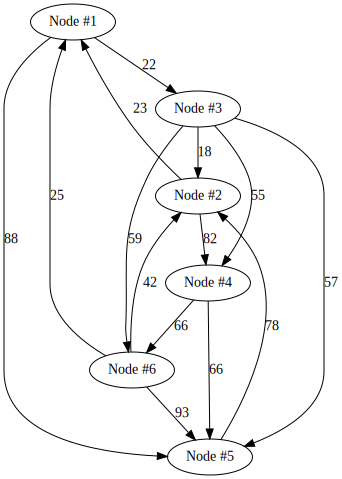

In [9]:
kruskal = Kruskal(nodes,edges)
out, anim = kruskal.run()

display_graph("Initial Raw Graph",nodes, edges)

## Final Graph Displaying Minimum Spanning Tree

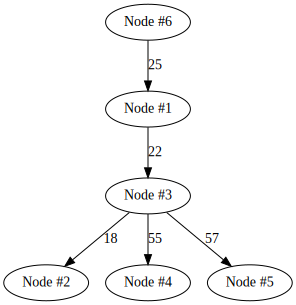

In [10]:
display_graph("Final Graph Displaying Minimum Spanning Tree", nodes, out)

## Comparing Initial Graph with Final Graph(MST)

> Green Edge Indicates, its included in MST.  Red ones are excluded from MST, they either case cycle or have high weight

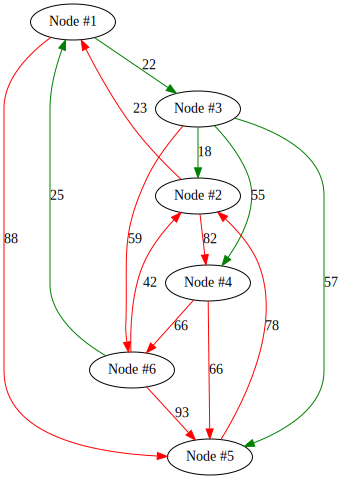

In [11]:
display_graph_edges_comparision("Comparing Initial Graph with Final Graph(MST)", nodes, edges, out)

In [12]:
printmd("## Interactive Run through Kruskal's Algorithm")
printmd("> It takes time proportional to complexity of graph. Be Pateint")
printmd("> Black is the original Node. Green color would indicate the edge doesn't have cycle and we include it, red otherwise.")
interactive(anim, 500 )

## Interactive Run through Kruskal's Algorithm

> It takes time proportional to complexity of graph. Be Pateint

> Black is the original Node. Green color would indicate the edge doesn't have cycle and we include it, red otherwise.

interactive(children=(IntSlider(value=0, description='n', max=37), Output()), _dom_classes=('widget-interact',…




## Complexity Analysis <a class="anchor" id="analysis"></a>

The complexity of Kruskal's algorithm depends directly on the **Data Structure** that is being used. 

### Naive Disjoint Set would yield:
> i.e. Not using Path Compression or Union by rank

+ MakeSet Operation Cost : $O(N)$
+ Find Operation Cost: $O(N)$
+ Union Operation Cost: 
    + Worst Case $O(N^2)$
    + Amortized $O(N)$

#### Time Complexity
| Operations | Cost Of Operation Details|
| ---- | ---- |
|Sorting E Edges| $E*log(E)$ |
|$V$ find operations For $E$ Edges|$E * V$|
|$E - 1$ Union Operations For $E$|$E * E$|


- Net = $E * (V + E)$
- Total Net = $E*log(E) + E*(V+E)$

**This Would lead the Time Complexity of Kruskals Algorithm to $O(E*log(E) + E*(V + E))$**

Since, $E< V^2$ 

Complexity ~ $O(E*log(V) + E*(V + E))$

---
### Improved Disjoint Set
---
#### Disjoint Set with Path Compression:
+ Find and Union Operation Cost: $\displaystyle \Theta (n+f\cdot (1+\log _{2+f/n}n))$


#### Disjoint Set with Rank By Union
+ Find Operation:  ${\displaystyle \Theta (m\lg n)}$

#### Disjoint Set with Path Compression & Rank By Union
+ Union and Find Operation Cost:  ${\displaystyle \Theta (\alpha (n))}$

> $\alpha$ is the inverse Ackermann function. Its safe to assume that all operations are performed in Constant Time. As The function grows very slow. 
>log* N = “log star of N” = smallest k such that log(k) n <= 1 or
>
> eg. Number of iterations it takes so that the log of base-2 of N <= 1
>
> for instance $log* 265536 = 5$

---
### Time Complexity

Using Disjoint Set with Path compression and Union by Rank, minimizes the Time complexity. 

#### Hence by using Optimized DisjointSet Data Structure
**We get Time Complexity as $O(E*log(V) + \Theta(\alpha(E)))$**

**i.e $\Theta(E*log(V))$**


#### Sorting Edges by using Linear Sorting Algorithm
**Time Complexity = $O(E*\alpha(V))$** 

---

<span style="background-color: #ffa899; padding: 2px;font-size: 23px;">Almost Linear Time!!.</span>


## Sources <a class="anchor" id="sources"></a>

#### Primary References
+ Introduction To Algorithms - CLRS (3rd Edition) - Chapter 21 (UnionFind | Disjoint Set) Chapter 27(MST)
+ Wikipedia - For Definitions and Complexity Proof
    + [Kruskal's Algorithm](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm#Complexity)
    + [Disjoint Set](https://en.wikipedia.org/wiki/Disjoint-set_data_structure)
    + [Minimum Spanning Tree](https://simple.wikipedia.org/wiki/Minimum_spanning_tree)
    + [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree)
+ Disjoint Set Analysis by https://cp-algorithms.com/data_structures/disjoint_set_union.html
+ Relationship between Disjoint and Kruskal's analysis by [UCSD](https://cseweb.ucsd.edu/classes/fa15/cse100-a/lectures-c/Lec13-Graph.pdf)
+ Naive Disjoint Set analysis by [Princeton](https://www.cs.princeton.edu/~wayne/kleinberg-tardos/pdf/UnionFind.pdf)
+ Kruskal's Analysis by [Stanford](http://web.stanford.edu/class/archive/cs/cs166/cs166.1166/lectures/16/Small16.pdf)

#### Other References
+ [History Of Minimum Spanning Tree](http://www.math.ucsd.edu/~ronspubs/85_07_minimum_spanning_tree.pdf)


#### Library Documentation
+ [Markdown](https://www.markdownguide.org/extended-syntax/#escaping-pipe-characters-in-tables)
+ [GraphViz](https://github.com/xflr6/graphviz)
+ [GraphVizAnim](https://github.com/mapio/GraphvizAnim)
+ [RISE](https://github.com/damianavila/RISE)
+ [Jupyter Notebook presentation](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f)
